In [54]:
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from xgboost import plot_tree
from xgboost import XGBClassifier

import pandas as pd

In [55]:
df = pd.read_csv('datasetNovoUpdate.csv')

df

,dev-01,dev-02,dev-03,dev-04,dev-05,dev-06,dev-07,dev-08,dev-09,dev-10,...,SEC04-BP02,SEC04-BP03,SEC11-BP01,SEC11-BP02,SEC11-BP03,SEC11-BP04,SEC11-BP05,SEC11-BP06,SEC11-BP07,SEC11-BP08
0,1,1.0,1,1,1,1.0,1.0,1,1,1,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1.0,1,1,1,1.0,1.0,1,1,1,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,1.0,1,1,1,1.0,1.0,1,1,0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1,1.0,1,1,1,1.0,1.0,1,1,0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,1.0,1,1,1,1.0,1.0,1,0,1,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0,NaN,0,0,0,NaN,NaN,0,1,0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2044,0,NaN,0,0,0,NaN,NaN,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2045,0,NaN,0,0,0,NaN,NaN,0,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2046,0,NaN,0,0,0,NaN,NaN,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X = df[
    ['dev-01', 'dev-02', 'dev-03', 'dev-04', 'dev-05', 'dev-06', 'dev-07', 'dev-08', 'dev-09', 'dev-10',
                'dev-11',]]

y = df[['SEC01-BP01', 'SEC01-BP06', 'SEC02-BP02', 'SEC02-BP03', 'SEC02-BP05', 'SEC03-BP07',
                    'SEC03-BP08', 'SEC04-BP02', 'SEC04-BP03', 'SEC11-BP01', 'SEC11-BP02', 'SEC11-BP03', 'SEC11-BP04',
                    'SEC11-BP05', 'SEC11-BP06', 'SEC11-BP07', 'SEC11-BP08']]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Shapes of training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of training and testing sets:
X_train shape: (1638, 11)
X_test shape: (410, 11)
y_train shape: (1638, 17)
y_test shape: (410, 17)


In [58]:
# Initialize the DecisionTreeClassifier
clf = XGBClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00       215
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       218
           8       1.00      1.00      1.00       106
           9       1.00      1.00      1.00       188
          10       1.00      1.00      1.00       188
          11       1.00      1.00      1.00       298
          12       1.00      1.00      1.00       188
          13       1.00      1.00      1.00        79
          14       1.00      1.00      1.00       188
          15       1.00      1.00      1.00       188
          16       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


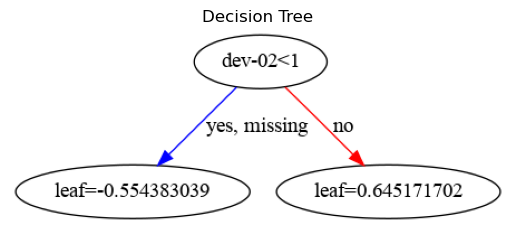

In [59]:
# Plot decision tree
# plt.figure(figsize=(15, 10))
plot_tree(clf)
plt.title(f"Decision Tree")

output_dir = 'decision_trees'
os.makedirs(output_dir, exist_ok=True)

# Save the plot as an image
image_path = os.path.join(output_dir, f"decision_tree.png")
plt.savefig(image_path)

# Display the plot (optional)
plt.show()

# Close the plot to release memory
plt.close()


In [61]:
import numpy as np

# Example prediction
X_test = np.array([[1,1,1,1,1,1,1,1,1,1,None]]) 
predicted_classes = clf.predict(X_test)

predicted_classes

array([[1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.]])